In [1]:
import jax.numpy as jnp
from jax import grad, jit
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [26]:

loss_data = jnp.load('tailored_geometry_ybias100_loss.npy')

# Generate synthetic batch numbers
batch_numbers = jnp.arange(len(loss_data))

# Define the exponential decay function
def exp_decay(batch, L0, k, epsilon):
    return L0 * jnp.exp(-k * batch) + epsilon

# Fit the model using curve_fit from scipy
def fit_exp_decay(batch_numbers, loss_data):
    # Initial guess for L0, k, epsilon
    initial_guess = [jnp.max(loss_data), 1e-3, jnp.min(loss_data)]
    
    # Use scipy's curve_fit for fitting
    popt, pcov = curve_fit(
        lambda x, L0, k, epsilon: exp_decay(x, L0, k, epsilon),
        xdata=batch_numbers,
        ydata=loss_data,
        p0=initial_guess,
        maxfev=10000  # Allow more function evaluations if needed
    )
    return popt

# Fit the loss data
params = fit_exp_decay(batch_numbers, loss_data)
L0, k, epsilon = params

# Print fitted parameters
print(f"Fitted Parameters:\nL0 = {L0}\nk = {k}\nepsilon = {epsilon}")

# Generate fitted loss values for plotting
fitted_loss = exp_decay(batch_numbers, L0, k, epsilon)


Fitted Parameters:
L0 = 0.8537809609210164
k = 0.003743143693325952
epsilon = 0.006088999750842811


In [27]:
jnp.mean(loss_data[100_000:])

Array(0.00492146, dtype=float32)

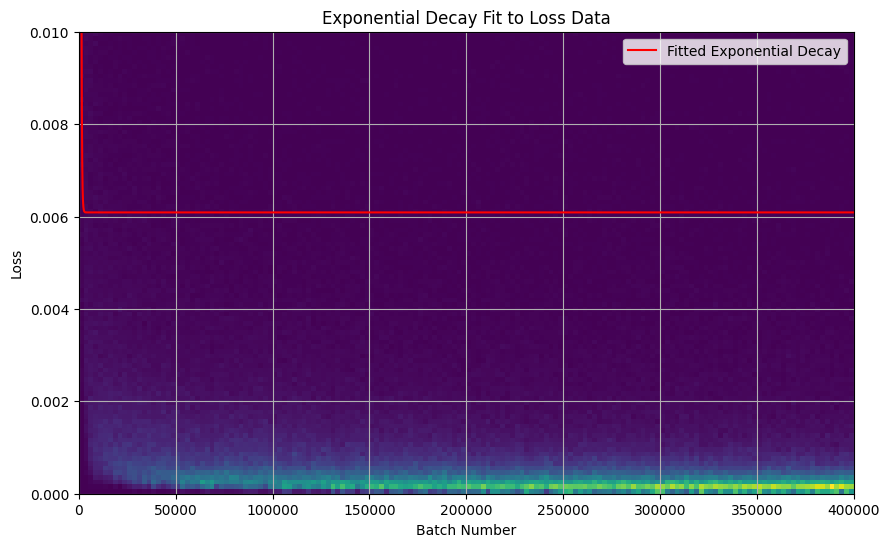

In [28]:
# Plot the original loss data and the fitted curve
plt.figure(figsize=(10, 6))
# plt.plot(batch_numbers, loss_data, label="Original Loss Data", alpha=0.5, color="blue")
plt.hist2d(batch_numbers, loss_data, bins=(
    jnp.arange(0, loss_data.shape[0], 2_500),
    jnp.linspace(0, 1E-2, 100)
    # jnp.logspace(-6, 1, 128)
), cmap='viridis')
plt.plot(batch_numbers, fitted_loss, label="Fitted Exponential Decay", color="red")
# plt.yscale("log")
plt.ylim(0,1E-2)
plt.xlabel("Batch Number")
plt.ylabel("Loss")
plt.title("Exponential Decay Fit to Loss Data")
plt.legend()
plt.grid(True)
plt.show()
